<a href="https://colab.research.google.com/github/josewborba/portfolio/blob/main/house_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/kaggle_datasets/kc_house_data.csv', parse_dates=['date'])

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,2014-10-15,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
data.info

<bound method DataFrame.info of                id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.0         3       1.00         1180   
1      6414100192 2014-12-09  538000.0         3       2.25         2570   
2      5631500400 2015-02-25  180000.0         2       1.00          770   
3      2487200875 2014-12-09  604000.0         4       3.00         1960   
4      1954400510 2015-02-18  510000.0         3       2.00         1680   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21  360000.0         3       2.50         1530   
21609  6600060120 2015-02-23  400000.0         4       2.50         2310   
21610  1523300141 2014-06-23  402101.0         2       0.75         1020   
21611   291310100 2015-01-16  400000.0         3       2.50         1600   
21612  1523300157 2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  ...  grade  

In [8]:
data.shape

(21613, 21)

In [9]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
categorical_ordinal = data[['bedrooms','bathrooms','floors','grade','condition','view','yr_built','yr_renovated']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fb8f4e810>,
      dtype=object)

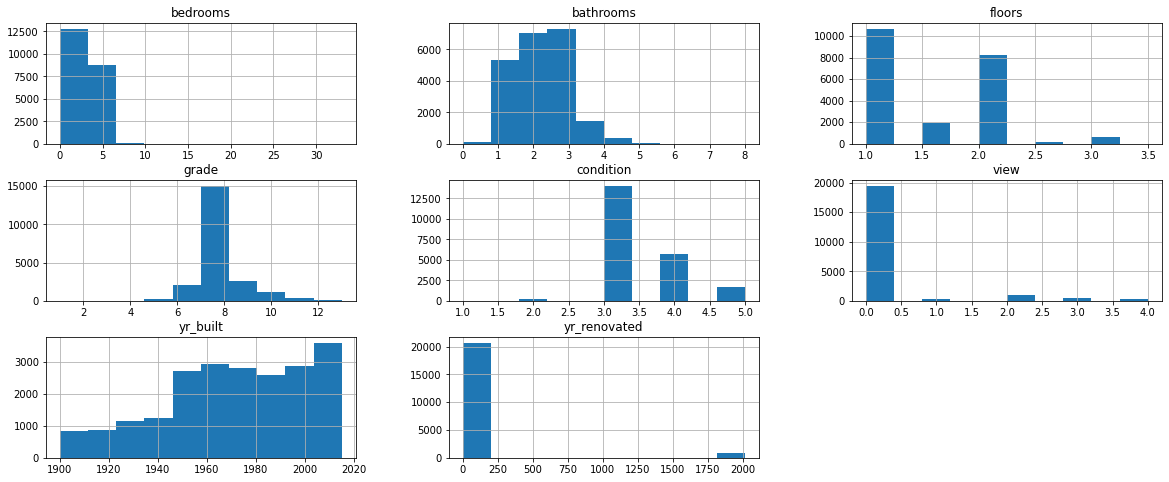

In [13]:
categorical_ordinal.hist(figsize=[20,8])


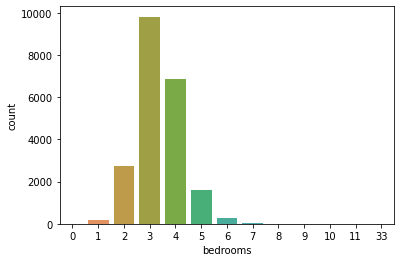

In [14]:
sns.countplot(x='bedrooms', data=data)

In [15]:
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [16]:
many_bedrooms = data[data['bedrooms'] > 10]

In [17]:
many_bedrooms

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


If it were a real project I would drop the row 15870 (id 2402100895) because it's weird 33 bedrooms and 1.75 bathrooms in one floor. The grade is the highest, and the other squarefoots are big too, which makes me think that is not a wrong record, just an outlier when it comes to bedrooms.
After that would re-do the histograms in order to better understand de distribution.



Looking a little deeper into 'yr_renovated'. Only variable with wierd distribution. 95% of the values are 0. Which probable means no renovation was made (or recorded).

If i were deleting V

In [18]:
#to_drop = list(many_bedrooms.index)
#to_drop

In [19]:
# data.drop(to_drop, inplace=True)

In [20]:
data['yr_renovated'].value_counts(normalize=True)

0       0.957711
2014    0.004210
2013    0.001712
2003    0.001666
2005    0.001619
          ...   
1951    0.000046
1959    0.000046
1948    0.000046
1954    0.000046
1944    0.000046
Name: yr_renovated, Length: 70, dtype: float64

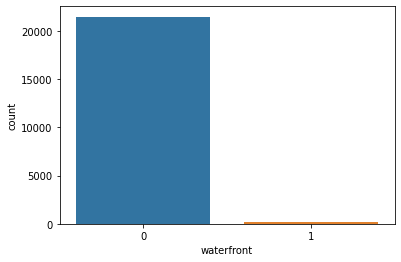

In [21]:
sns.countplot(x='waterfront', data=data)

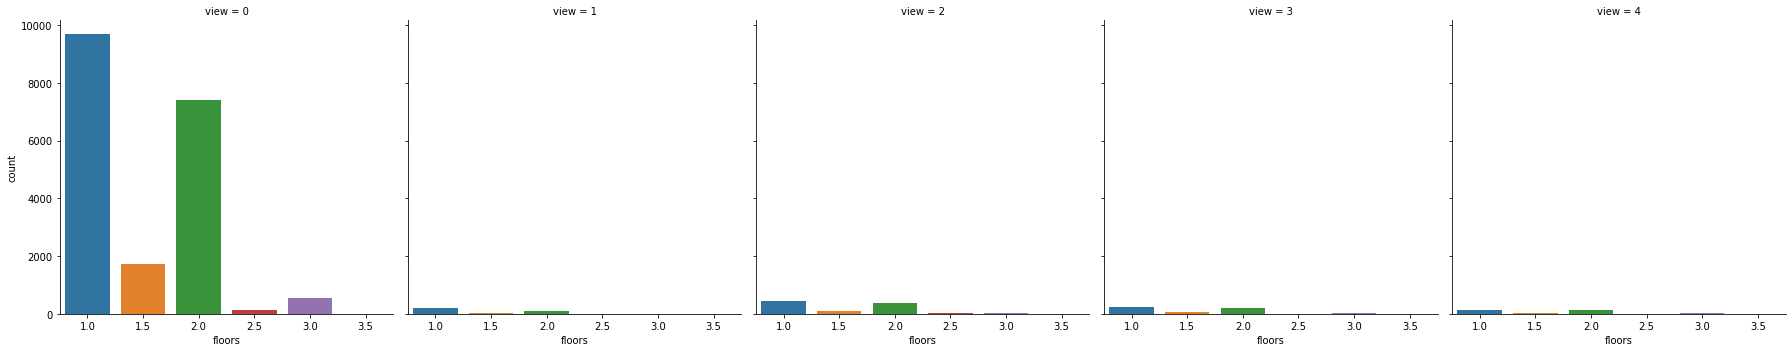

In [22]:
sns.catplot(x='floors', col='view', kind='count', data=data)

One hypothesis is that the better the view, more floors houses tend to have. Looking at this graph i don't think is there any relation. /\:

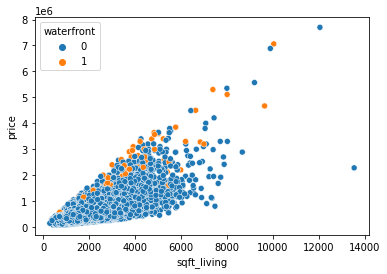

In [23]:
sns.scatterplot(y='price', x='sqft_living', hue='waterfront', data=data)

Waterfront is related to house prices. /\
*Can't say if it cause or consequence*

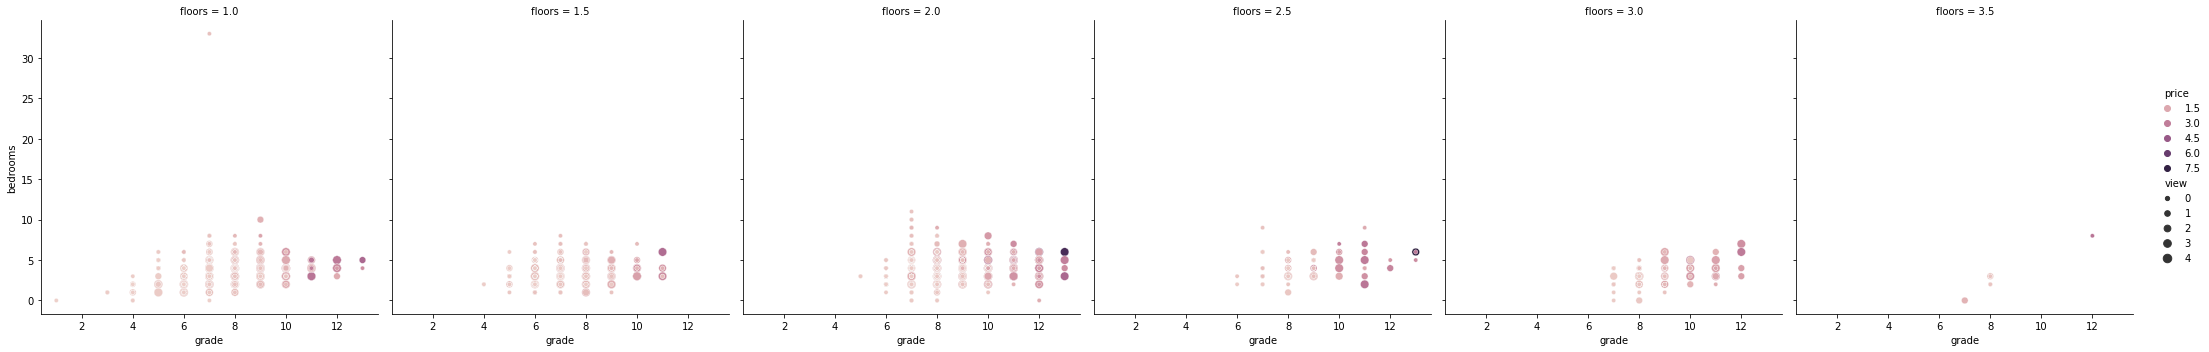

In [24]:
sns.relplot(x='grade',y='bedrooms', col='floors', hue='price', size='view',kind='scatter', data=data)

it looks like that grade more than anything is related to price. It makes sense once that grade might be a good proxy of the general state of the houses

Starting analysis for numerical features

In [25]:
numerical = data[['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]

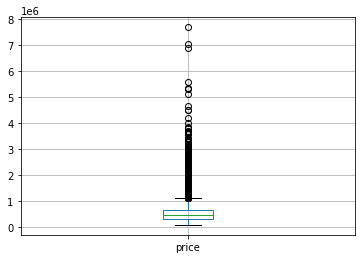

In [26]:
numerical[['price']].boxplot()

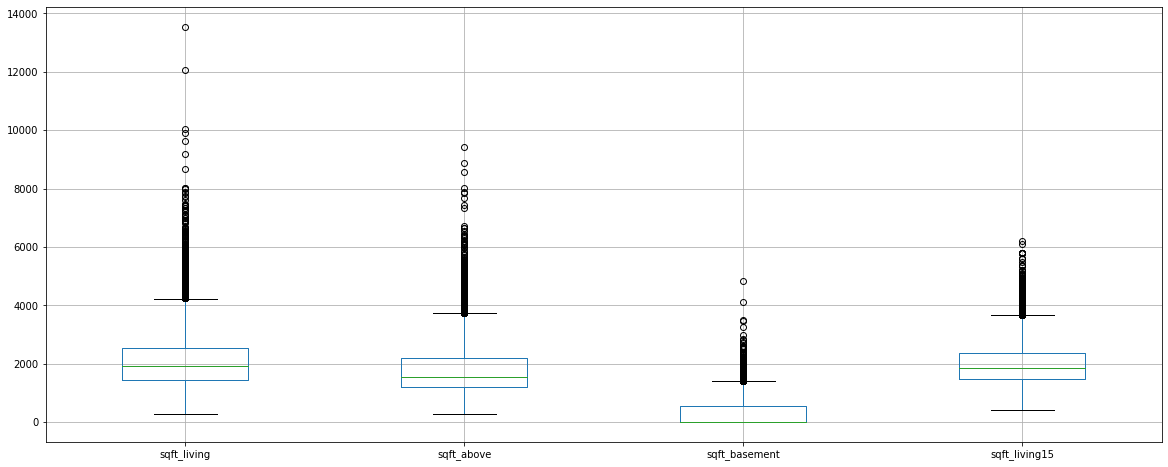

In [27]:
numerical.iloc[:,[1,3,4,5]].boxplot(figsize=[20,8])

this numerical data has a lot of noise, high variance, many outliers.

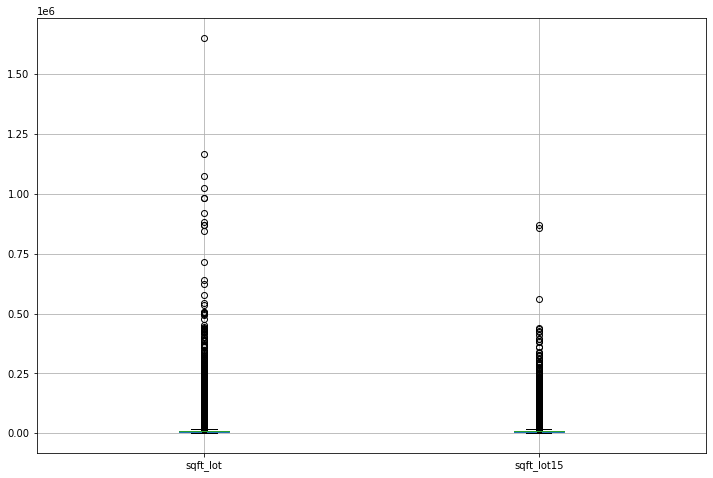

In [28]:

numerical.iloc[:,[2,6]].boxplot(figsize=[12,8])


In [29]:
plot_data = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']]

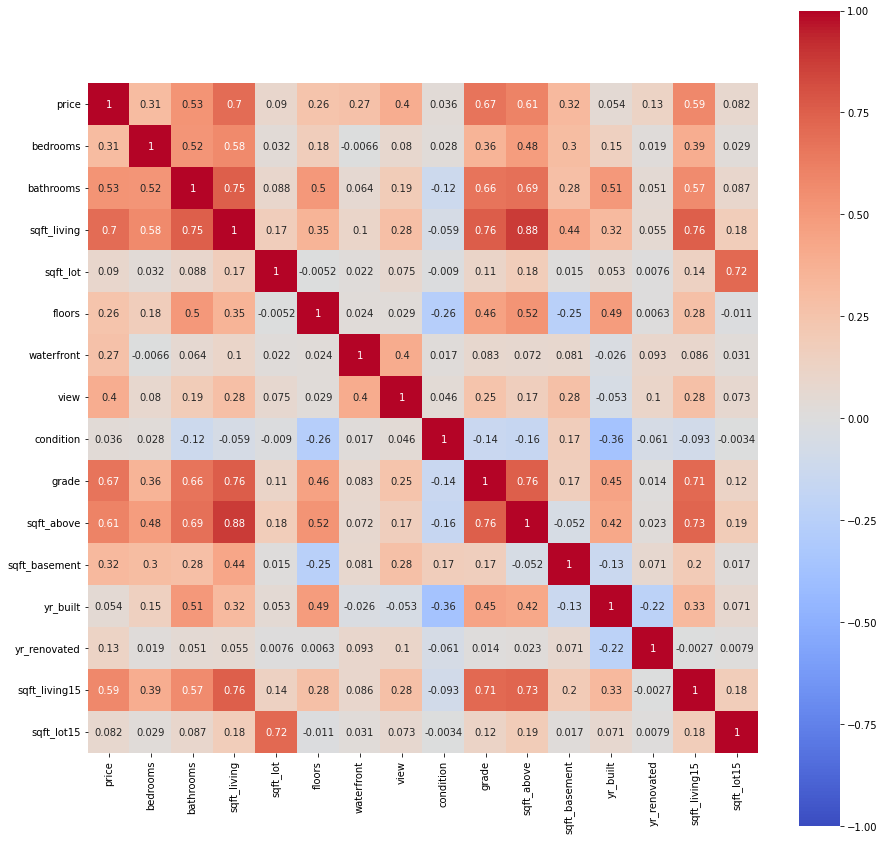

In [30]:
corr = plot_data.corr()
graph = sns.heatmap(corr, vmax=1, vmin=-1, center=0, square=True, cmap='coolwarm', annot=True)
graph.figure.set_size_inches(15,15)

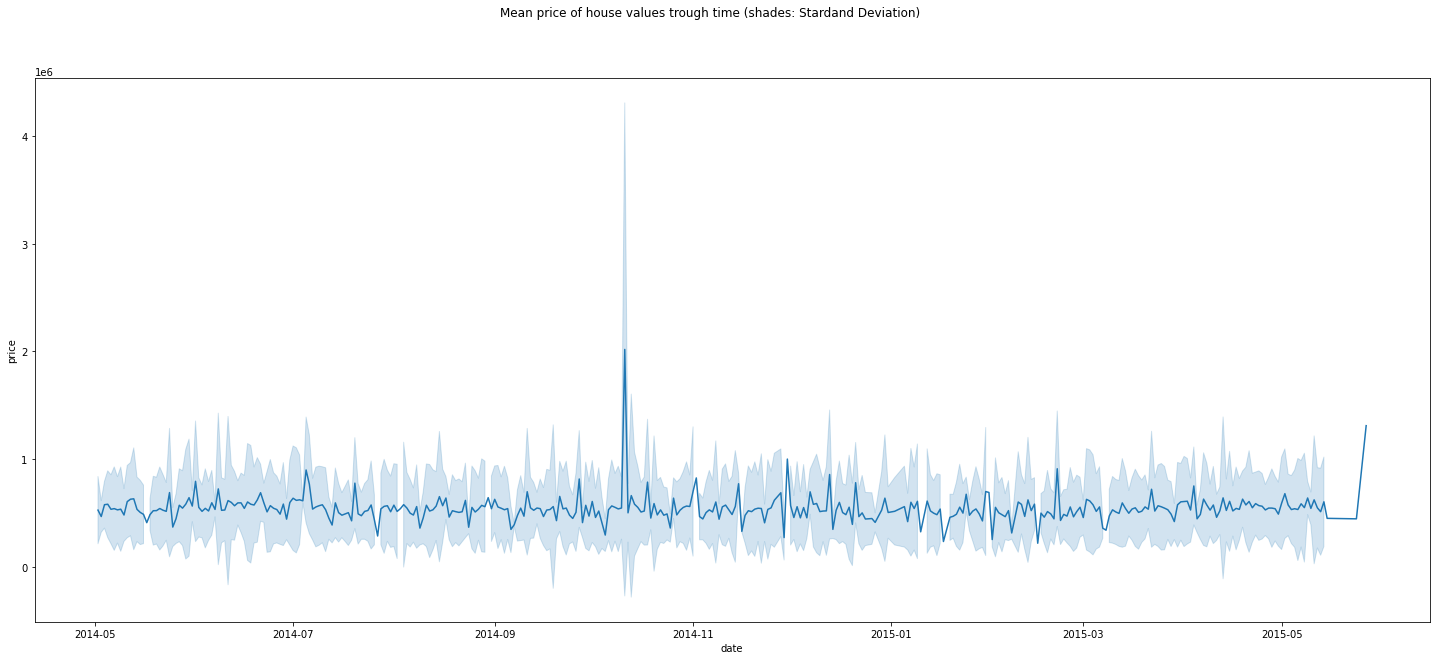

In [31]:
fig, ax = plt.subplots(figsize=(25,10))
fig.suptitle('Mean price of house values trough time (shades: Stardand Deviation)')
sns.lineplot(x='date', y='price', ci='sd', data=data)

High SD. Which indicates the values vary a lot and the mean might not be a good value to understand the prices. Median might make more sense.

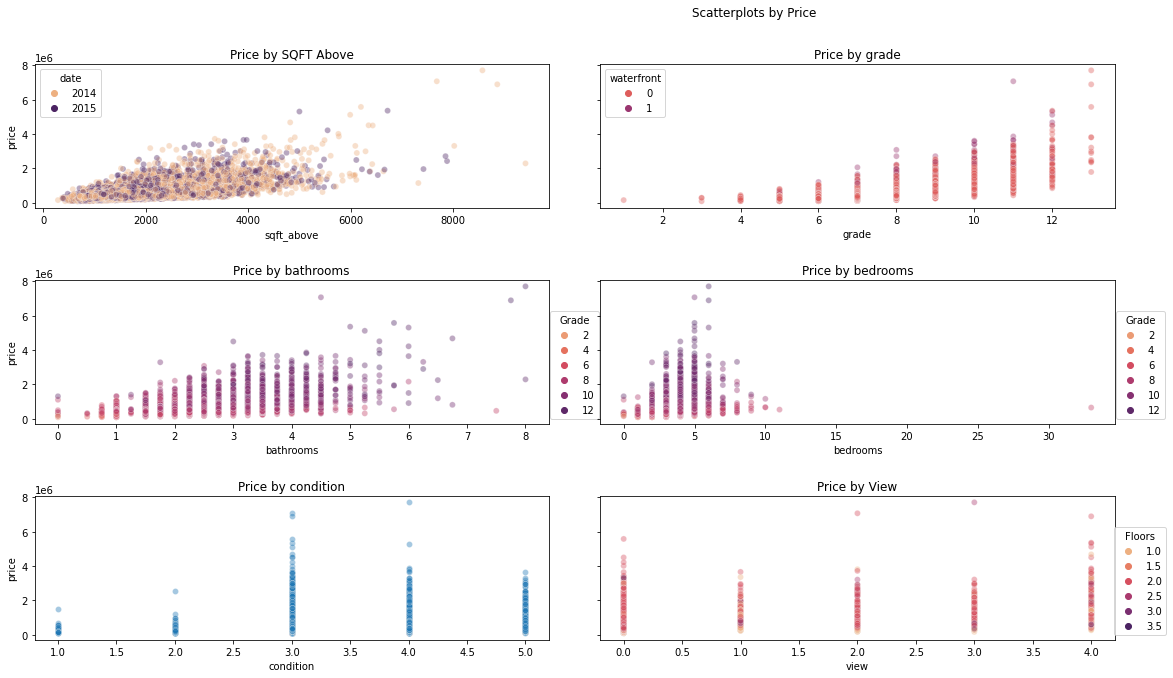

In [32]:
fig, ax = plt.subplots(3,2, figsize=(25,10), sharey=True)
fig.suptitle('Scatterplots by Price')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.7, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.5)

sns.scatterplot(ax=ax[0,0], x=data['sqft_above'], y=data['price'], hue=pd.DatetimeIndex(data['date']).year, alpha=0.4, palette='flare')
ax[0,0].set_title('Price by SQFT Above')

sns.scatterplot(ax=ax[0,1], x=data['grade'], y=data['price'], hue=data['waterfront'], alpha=0.4, palette='flare')
ax[0,1].set_title('Price by grade')

sns.scatterplot(ax=ax[1,0], x=data['bathrooms'], y=data['price'], hue=data['grade'], alpha=0.4, palette='flare')
ax[1,0].set_title('Price by bathrooms')
sns.move_legend(ax[1,0], "lower center", bbox_to_anchor=(1.05, 0), ncol=1, title='Grade', frameon=True)

sns.scatterplot(ax=ax[1,1], x=data['bedrooms'], y=data['price'], hue=data['grade'], alpha=0.4, palette='flare')
ax[1,1].set_title('Price by bedrooms')
sns.move_legend(ax[1,1], "lower center", bbox_to_anchor=(1.05, 0), ncol=1, title='Grade', frameon=True)

sns.scatterplot(ax=ax[2,0], x=data['condition'], y=data['price'], alpha=0.4, palette='flare')
ax[2,0].set_title('Price by condition')

sns.scatterplot(ax=ax[2,1], x=data['view'], y=data['price'], hue=data['floors'], alpha=0.4, palette='flare')
ax[2,1].set_title('Price by View')
sns.move_legend(ax[2,1], "lower center", bbox_to_anchor=(1.05, 0), ncol=1, title='Floors', frameon=True)

Some insights

1.   Price by grade indicates that the higher the grades (also waterfront) higher the price. Makes sense with we've seen so far.
2.   Price by bedrooms indicate a bell curve, until 6 bedrooms price rises, after that decreases.
3.   Price by bathroom, price by condition and price by view doesn't show conclusive relashionships.




Creation and fit of the model

In [33]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [34]:
model_df = data.loc[:,['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15','price']]
model_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,360000.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,400000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,402101.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,400000.0


In [35]:
X = model_df.iloc[:,1:15]
Y = model_df.iloc[:,15]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [36]:
X_train.shape,  Y_train.shape

((15129, 14), (15129,))

In [37]:
X_test.shape, Y_test.shape

((6484, 14), (6484,))

In [38]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

Apply trained model to make predition (on test set)

In [39]:
Y_pred = model.predict(X_test)


In [40]:
X_test

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
17826,1.75,1370,10780,1.0,0,0,3,7,1370,0,1959,0,1370,10317
15225,2.50,1950,3720,2.0,0,0,3,8,1950,0,2004,0,1720,3720
9423,1.00,1210,7425,1.0,0,0,4,6,1210,0,1910,0,1260,7425
14042,1.00,770,9497,1.0,0,0,3,6,770,0,1950,0,1550,7532
7792,2.25,2510,12013,2.0,0,0,3,8,2510,0,1988,0,1870,8017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13030,2.00,1250,8636,1.0,0,0,5,7,1250,0,1968,0,1620,7653
16486,1.00,1180,7200,1.0,0,0,4,7,1180,0,1968,0,1180,7200
14305,2.75,2170,2738,1.5,0,0,4,9,1550,620,1930,0,1170,1062
16853,2.25,2170,10000,1.0,0,0,3,8,1420,750,1975,0,2390,11000


In [41]:
Y_pred, Y_pred.shape

(array([337912.02010083, 448228.61714308, 352138.20803881, ...,
        870751.45813566, 564481.19033351, 570946.42166596]), (6484,))

Model Evaluation

In [46]:
print('The coefficient of determination (R^2) is:', r2_score(Y_test, Y_pred))
print('The intercept is', round(float(model.intercept_),2))
print('The coefficients are', model.coef_)
print('Mean Squared Error (MSE): ', round(mean_squared_error(Y_test, Y_pred)))

The coefficient of determination (R^2) is: 0.6537820776871572
The intercept is 6040935.28
The coefficients are [ 3.19629271e+04  9.99666044e+01  5.05322170e-02  2.36527367e+04
  5.77455473e+05  4.65141234e+04  1.47540465e+04  1.25285195e+05
  4.84200642e+01  5.15465403e+01 -3.53784108e+03  1.04366501e+01
  2.08493872e+01 -5.46388111e-01]
Mean Squared Error (MSE):  41548892132


In [ ]:
#model2 = sm.ols(formula = 'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + sqft_living15 + sqft_lot15', data=data )
#model2_trained = model2.fit()
#model2_trained.summary()

In [ ]:
#model2 = sm.ols(formula='price ~ grade + waterfront + bedrooms + sqft_basement', data=data)
#model2_trained = model2.fit()
#model2_trained.summary()